# Understanding Uncertainty

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from scipy import stats

import ipywidgets as wg
from IPython.display import display

In [2]:
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


<IPython.core.display.Javascript object>


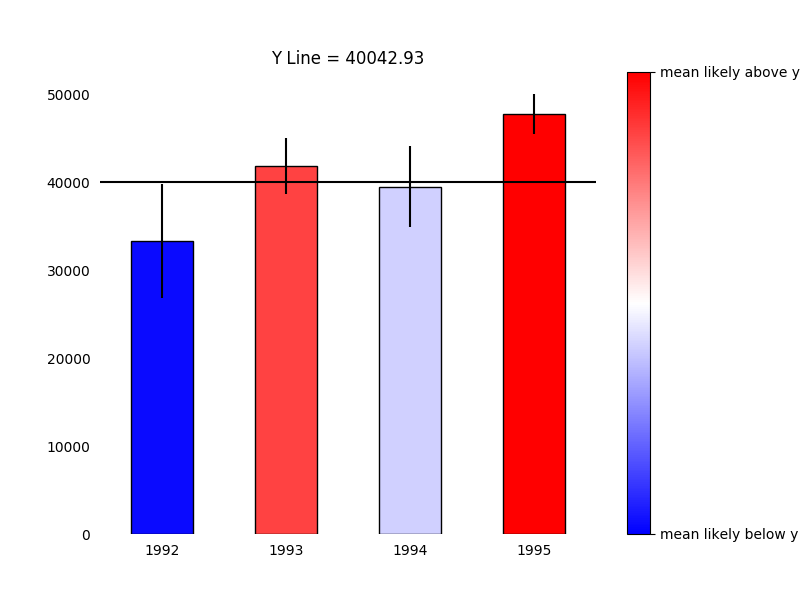

In [3]:
#restart the kernel to run this cell if you've already run the next one.
%matplotlib notebook

matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

#get 95% confidence intervals for means of each year sampled
conf_ints = []
for _,row in df.iterrows():
    bounds = stats.norm.interval(0.95, loc=np.mean(row), scale=np.std(row)/np.sqrt(len(row)))
    err = (bounds[1] - bounds[0])/2
    conf_ints.append(err)

#set up coloring gradient
grad = colors.LinearSegmentedColormap.from_list("BuWtRd",['b','w','r'])
cmap = cm.ScalarMappable(colors.Normalize(0, 1), grad)
cmap.set_array([])

#plotting
fig = plt.figure()
cbar = fig.colorbar(cmap, ticks=[0, 1])
cbar.set_ticklabels(['mean likely below y', 'mean likely above y'])
    #plot data
bars = (df.apply(np.mean, axis=1)
        .plot(kind='bar',
            color=cmap.to_rgba([0.5]*len(df)),
            edgecolor=['black']*4,
            yerr=conf_ints))
    #adjust plot
plt.xticks(range(4), df.index, rotation='horizontal')
plt.tick_params(bottom='off', left='off')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

def on_click(event):
    plt.cla()
    y_val = event.ydata
    plt.axhline(y_val, c='black')
    color_condition = []
    for row in range(len(df)):
        avg = np.mean(df.iloc[row])
        std = np.std(df.iloc[row])/np.sqrt(len(df.iloc[row]))
        cond_val = 1 - stats.norm.cdf(y_val, loc=avg, scale=std)
        color_condition.append(cond_val)
    bars = (df.apply(np.mean, axis=1)
            .plot(kind='bar',
                color=cmap.to_rgba(color_condition),
                edgecolor=['black']*4,
                yerr=conf_ints))
    plt.xticks(range(4), df.index, rotation='horizontal') #needed to be repeated for after clicks
    plt.gca().set_title('Y Line = {}'.format(round(y_val,2)))

plt.gcf().canvas.mpl_connect('button_press_event', on_click);

In [4]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

#get 95% confidence intervals for means of each year sampled
conf_ints = []
for _,row in df.iterrows():
    bounds = stats.norm.interval(0.95, loc=np.mean(row), scale=np.std(row)/np.sqrt(len(row)))
    err = (bounds[1] - bounds[0])/2
    conf_ints.append(err)

#set up coloring gradient
grad = colors.LinearSegmentedColormap.from_list("WtRd",['w','r'])
cmap = cm.ScalarMappable(colors.Normalize(0, 1), grad)
cmap.set_array([])

def control_range(y_range):
    plt.cla()
    #plot y-lines
    plt.axhline(y_range[0], c='black')
    plt.axhline(y_range[1], c='black')
    
    #define color values for each bar
    y_set = set(range(*y_range))
    color_condition = []
    for row in range(len(df)):
        avg = np.mean(df.iloc[row])
        std = np.std(df.iloc[row])/np.sqrt(len(df.iloc[row]))
        cond_val = stats.norm.cdf(max(y_set), loc=avg, scale=std) - stats.norm.cdf(min(y_set), loc=avg, scale=std)
        color_condition.append(cond_val)
    cbar = plt.colorbar(cmap, ticks=[0,1])
    cbar.set_ticklabels(['mean likely outside range', 'mean likely inside range'])
    cbar.ax.tick_params(labelsize=14)
    
    #plot bars
    bars = (df.apply(np.mean, axis=1)
            .plot(kind='bar',
                color=cmap.to_rgba(color_condition),
                edgecolor=['black']*4,
                yerr=conf_ints))
    
    #adjust figure formatting
    plt.xticks(range(4), df.index, rotation='horizontal')
    plt.tick_params(bottom='off', left='off', labelsize=14)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.show()

    
y_range = wg.IntRangeSlider(value=[38000, 40500], min=0, max=50000, description='Y Range', orientation='horizontal', continuous_update=False,  layout=wg.Layout(width='60%'))
wg.interact(control_range, y_range=y_range);

interactive(children=(IntRangeSlider(value=(38000, 40500), continuous_update=False, description='Y Range', layout=Layout(width='60%'), max=50000), Output()), _dom_classes=('widget-interact',))